<a href="https://colab.research.google.com/github/skaghzz/research/blob/master/2.cifar-10/%EA%B9%80%EB%82%A8%ED%98%B8/sub_problem_2/cnn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 데이터셋 정의
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

# 배치 크기 지정
trainloader = torch.utils.data.DataLoader(dataset=trainset,
                                          batch_size=4,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=4,
                                         shuffle=False)
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

total_batch = len(trainloader)
print('총 배치 개수 : {}'.format(total_batch))

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
총 배치 개수 : 12500


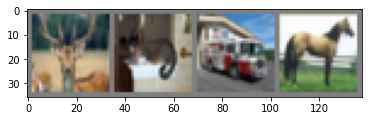

 deer   cat truck horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주는 함수
def imgShow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# 학습용 이미지를 무작위로 가져옴 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여줌 
imgShow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
# cnn 정의하기
import torch.nn as nn
import torch.nn.functional as F

class Cnn_tutorial(nn.Module):
  def __init__(self):
    super(Cnn_tutorial, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

summary(Cnn_tutorial().to(device), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [6]:
# cnn 정의하기
import torch.nn as nn
import torch.nn.functional as F

class myCnn(nn.Module):
  def __init__(self):
    super(myCnn, self).__init__()

    # input -> 3*32*32
    # conv2d -> 16*32*32  ## (32-3+2*1) / 1 + 1
    # maxPool -> 16*16*16 ## (32-2+2*0) / 2 + 1
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    # input -> 16*16*16
    # conv2d -> 64*14*14 ## (16-5+2*1) / 1 + 1
    # maxPool -> 64*7*7 ## (14-2+2*0) / 2 + 1
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    # input -> 64*7*7
    # conv2d -> 256*7*7 ## (7-3+2*1) / 1 + 1
    # maxpool -> 256*3*3 ## (7-2+2*0) / 2 + 1
    self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.fc1 = nn.Sequential(
        nn.Linear(256*3*3, 120),
        nn.ReLU()
    )
    self.fc2 = nn.Sequential(
        nn.Linear(120, 84),
        nn.ReLU()
    )
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return x

summary(myCnn().to(device), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
         MaxPool2d-3           [-1, 16, 16, 16]               0
            Conv2d-4           [-1, 64, 14, 14]          25,664
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 256, 7, 7]         147,712
              ReLU-8            [-1, 256, 7, 7]               0
         MaxPool2d-9            [-1, 256, 3, 3]               0
           Linear-10                  [-1, 120]         276,600
             ReLU-11                  [-1, 120]               0
           Linear-12                   [-1, 84]          10,164
             ReLU-13                   [-1, 84]               0
           Linear-14                   

In [7]:
# tutorial 모델과 직접만든 모델중에서 선택
cnn = myCnn().to(device)
#cnn = Cnn_tutorial().to(device)

In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss() # loss funciton - 교차 엔트로피 손실
optimizer = optim.Adam(cnn.parameters(), lr=1e-4) # optimizer - adam

In [9]:
epochs = 15
for epoch in range(epochs):
  running_loss = 0.0
  avg_cost = 0
  for i, data in enumerate(trainloader, 0):
    # [inputs, labels]의 목록인 data로부터 입력을 받음
    inputs, labels = data[0].to(device), data[1].to(device)

    # 변화도(Gradient) 매개변수를 0으로 만든다
    optimizer.zero_grad()

    hypothesis = cnn(inputs) # forward propagation
    loss = criterion(hypothesis, labels)
    loss.backward() # back propagation
    optimizer.step() # optimizing

    # 통계를 출력
    running_loss += loss.item()
    if i % 3000 == 2999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/3000))
      running_loss = 0.0
    
    avg_cost += loss / total_batch
  print('[Epoch: {:>4}] loss = {:>.9}'.format(epoch+1, avg_cost))
print('Finished Training')

[1,  3000] loss: 1.879
[1,  6000] loss: 1.611
[1,  9000] loss: 1.513
[1, 12000] loss: 1.433
[Epoch:    1] loss = 1.60053265
[2,  3000] loss: 1.347
[2,  6000] loss: 1.305
[2,  9000] loss: 1.263
[2, 12000] loss: 1.229
[Epoch:    2] loss = 1.2816608
[3,  3000] loss: 1.155
[3,  6000] loss: 1.109
[3,  9000] loss: 1.095
[3, 12000] loss: 1.064
[Epoch:    3] loss = 1.10479772
[4,  3000] loss: 0.993
[4,  6000] loss: 0.988
[4,  9000] loss: 0.963
[4, 12000] loss: 0.951
[Epoch:    4] loss = 0.972724795
[5,  3000] loss: 0.884
[5,  6000] loss: 0.863
[5,  9000] loss: 0.871
[5, 12000] loss: 0.852
[Epoch:    5] loss = 0.86589992
[6,  3000] loss: 0.778
[6,  6000] loss: 0.783
[6,  9000] loss: 0.770
[6, 12000] loss: 0.749
[Epoch:    6] loss = 0.771192908
[7,  3000] loss: 0.691
[7,  6000] loss: 0.686
[7,  9000] loss: 0.688
[7, 12000] loss: 0.693
[Epoch:    7] loss = 0.688666284
[8,  3000] loss: 0.607
[8,  6000] loss: 0.621
[8,  9000] loss: 0.612
[8, 12000] loss: 0.627
[Epoch:    8] loss = 0.6153211
[9,  30

In [10]:
# 전체 test데이터로 모델의 예측 정확도 측정하기
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = cnn(images).to(device)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct /total))

Accuracy of the network on the 10000 test images: 73 %


In [11]:
# 클래스별 분류 정확도
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = cnn(images).to(device)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i] / class_total[i]))

Accuracy of plane : 79 %
Accuracy of   car : 86 %
Accuracy of  bird : 68 %
Accuracy of   cat : 52 %
Accuracy of  deer : 64 %
Accuracy of   dog : 73 %
Accuracy of  frog : 82 %
Accuracy of horse : 76 %
Accuracy of  ship : 81 %
Accuracy of truck : 74 %
